In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
# Configure Matplotlib to use LaTeX
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 18})

In [16]:
def subG_css(trSigma, lambdamax, n, r): 
    """
    Width of sub-Gaussian CSS. See Theorem 1
    """

    beta = np.sqrt(2*trSigma*r / lambdamax)
    lambda_num = beta + 2*r

    lambda_sum = 0 
    lambda2_sum = 0

    widths = []
    for t in range(1, n): 
        lambda_denom = (lambdamax + trSigma/beta)*t*np.log(t+10e4)
        lambdat =  np.sqrt(lambda_num / lambda_denom)
        lambda_sum += lambdat
        lambda2_sum += lambdat**2/2

        width_num = lambda2_sum*(lambdamax + trSigma/beta) + beta/2 + r
        width_denom = lambda_sum
        widths.append(width_num / width_denom) 

    return widths

def Hsu_n(trSigma, trSigma2, lambdamax, n, r): 
    """
    Compute width of Hsu's confidence region for n observations.
    """

    s = trSigma + 2*lambdamax*r + 2*np.sqrt(trSigma2*r)
    return np.sqrt(s/n)


def Hsu_doubling(trSigma, trSigma2, lambdamax, n, r): 
    """
    Compute width of Hsu's confidence region using 
    Duchi and Haque doubling trick. 
    """

    widths = []
    for t in range(1, n): 

        # if t is a power of 2 
        if (t & (t-1)) == 0: 
            width = Hsu_n(trSigma, trSigma2, lambdamax, t/2, r + 2*np.log(np.log2(t)) + 1/2)
            widths.append(width)
        else: 
            widths.append(widths[-1])

    return widths

def Hsu_union_bound(trSigma, trSigma2, lambdamax, n, r):
    """
    Compute width of Hsu's confidence region using
    naive union bound. 
    """
    
    widths = []
    for t in range(1, n): 
        width = Hsu_n(trSigma, trSigma2, lambdamax, t, r + np.log(t*(t+1)))
        widths.append(width)

    return widths


def stitched_css(trSigma, lambdamax, n, r): 
    """
    Compute width of stitched CSS.
    """
    widths = []

    for t in range(1, n): 

        term1 = 1.21 * np.sqrt(trSigma/t) 
        term2 = 1.682*np.sqrt(lambdamax*(r + np.log(1.65) + np.log(np.log2(t) + 1)) / t)

        widths.append(term1 + term2)   

    return widths 


/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_35708/356469910.py:35: RuntimeWarning: divide by zero encountered in log
  width = Hsu_n(trSigma, trSigma2, lambdamax, t/2, r + 2*np.log(np.log2(t)) + 1/2)
/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_35708/356469910.py:24: RuntimeWarning: invalid value encountered in sqrt
  s = trSigma + 2*lambdamax*r + 2*np.sqrt(trSigma2*r)


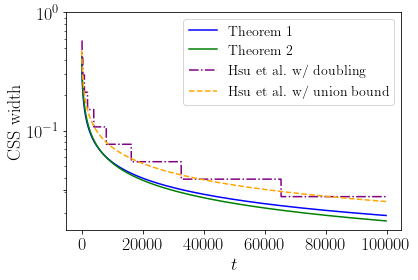

In [29]:
alpha = 0.05 
n = 100000

start = 150

TrSigma = 1
TrSigma2 = 1

css = subG_css(TrSigma, 1, n, np.log(1/alpha))
stitched = stitched_css(TrSigma, 1, n, np.log(1/alpha))
stitched_hsu = Hsu_doubling(TrSigma, TrSigma2, 1, n, np.log(1/alpha))
hsu_union = Hsu_union_bound(TrSigma, TrSigma2, 1, n, np.log(1/alpha))


plt.plot(css[start:], label='Theorem 1', c='blue')
plt.plot(stitched[start:], label='Theorem 2', ls='-', c='green')
plt.plot(stitched_hsu[start:], label='Hsu et al. w/ doubling', ls='-.', c='purple')
plt.plot(hsu_union[start:], label='Hsu et al. w/ union bound', ls='--', c='orange')


plt.legend(fontsize=14)
plt.yscale('log')
plt.ylabel('CSS width')
plt.xlabel('$t$')
plt.yticks([10**-1.5, 10**-1, 10**0])

plt.savefig('figures/subG.png', dpi=300, bbox_inches='tight')



/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_35708/356469910.py:35: RuntimeWarning: divide by zero encountered in log
  width = Hsu_n(trSigma, trSigma2, lambdamax, t/2, r + 2*np.log(np.log2(t)) + 1/2)
/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_35708/356469910.py:24: RuntimeWarning: invalid value encountered in sqrt
  s = trSigma + 2*lambdamax*r + 2*np.sqrt(trSigma2*r)


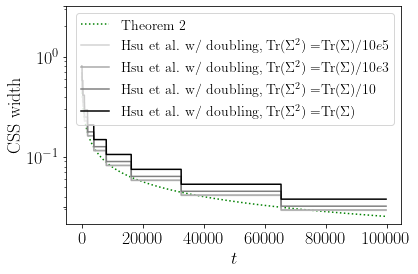

In [25]:
alpha = 0.05 
n = 100000
start = 150

stitched = stitched_css(10, 1, n, np.log(1/alpha))

stitched_Hsu_p1 = Hsu_doubling(10, 0.0001, 1, n, np.log(1/alpha))
stitched_hsu_1 = Hsu_doubling(10, 0.01, 1, n, np.log(1/alpha))
stitched_hsu_5 = Hsu_doubling(10, 1, 1, n, np.log(1/alpha))
stitched_hsu_10 = Hsu_doubling(10, 10, 1, n, np.log(1/alpha))


plt.plot(stitched[start:], label='Theorem 2', ls=':', c='green')
plt.plot(stitched_Hsu_p1[start:], label='Hsu et al. w/ doubling, Tr($\Sigma^2)= $Tr($\Sigma)/10e5$', ls='-', c='lightgray')
plt.plot(stitched_hsu_1[start:], label='Hsu et al. w/ doubling, Tr($\Sigma^2)= $Tr($\Sigma)/10e3$', ls='-', c='darkgray')
plt.plot(stitched_hsu_5[start:], label='Hsu et al. w/ doubling, Tr($\Sigma^2)= $Tr($\Sigma)/10$', ls='-', c='gray')
plt.plot(stitched_hsu_10[start:], label='Hsu et al. w/ doubling, Tr($\Sigma^2)= $Tr($\Sigma)$', ls='-', c='black')


plt.yscale('log')
plt.legend(fontsize=14)
plt.ylabel('CSS width')
plt.xlabel('$t$')
plt.yticks([10**-1.5, 10**-1, 10**0, 10**0.5])

plt.savefig('figures/subG_doubling.png', dpi=300, bbox_inches='tight')

